In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/gender_voice.csv")

In [3]:
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1056,0.190862,0.057047,0.205660,0.129984,0.239046,0.109062,1.693509,6.218785,0.906205,0.353393,0.205215,0.190862,0.116158,0.051010,0.266667,0.536133,0.023438,1.640625,1.617188,0.101127,male
665,0.165369,0.046280,0.181144,0.127340,0.198830,0.071489,2.501694,9.942257,0.891820,0.213013,0.193803,0.165369,0.115972,0.030593,0.238806,0.558919,0.007812,3.539062,3.531250,0.204646,male
2302,0.206964,0.055695,0.216829,0.195488,0.239451,0.043963,1.788383,5.904736,0.893281,0.365547,0.213841,0.206964,0.181608,0.048583,0.277457,0.930804,0.093750,12.023438,11.929688,0.056189,female
962,0.199217,0.060648,0.219884,0.137563,0.255629,0.118066,1.368589,3.903595,0.887228,0.258821,0.268627,0.199217,0.118799,0.046921,0.277457,0.934821,0.187500,6.023438,5.835938,0.082265,male
185,0.111692,0.079745,0.104220,0.039266,0.154862,0.115596,0.985696,3.816856,0.968797,0.781834,0.008807,0.111692,0.124567,0.016842,0.253968,0.101103,0.007812,0.312500,0.304688,0.291667,male
826,0.192943,0.057850,0.207025,0.148725,0.235184,0.086459,1.313445,4.417071,0.922132,0.444268,0.230028,0.192943,0.119190,0.047337,0.279070,0.732558,0.023438,7.289062,7.265625,0.072258,male
1981,0.196432,0.031257,0.196757,0.181622,0.212620,0.030998,2.852864,12.315420,0.860973,0.183373,0.196175,0.196432,0.191984,0.134454,0.271186,0.692336,0.007812,3.640625,3.632812,0.174700,female
517,0.150002,0.068328,0.162544,0.093932,0.202894,0.108961,1.953073,7.469802,0.950159,0.648723,0.084131,0.150002,0.093508,0.016343,0.258065,0.470982,0.007812,4.875000,4.867188,0.135587,male
911,0.197955,0.057826,0.225687,0.135518,0.244143,0.108625,2.275941,9.443009,0.884934,0.316923,0.243616,0.197955,0.139392,0.048731,0.279070,1.120175,0.023438,8.882812,8.859375,0.100803,male
885,0.195171,0.063780,0.223469,0.137344,0.249268,0.111924,1.350175,4.080138,0.916566,0.455479,0.233713,0.195171,0.124392,0.047952,0.279070,1.022727,0.023438,5.906250,5.882812,0.126060,male


In [4]:
data.shape

(3168, 21)

In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'].astype('str'))

In [8]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


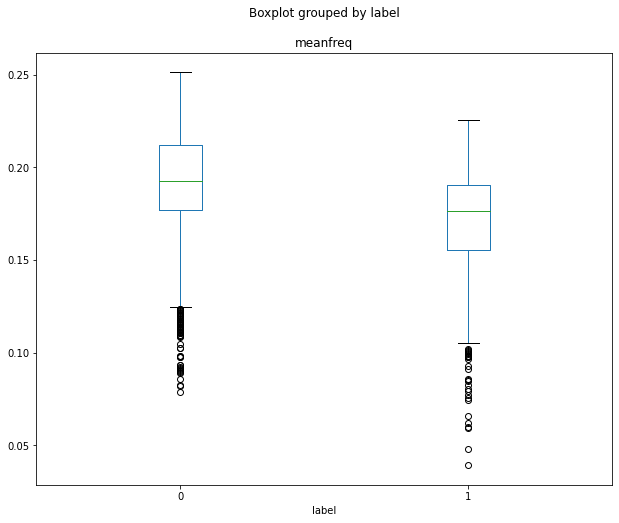

In [9]:
data.boxplot(by="label", column=["meanfreq"], grid=False, figsize=(10,8))

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['label'], axis=1)
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2534, 20) (2534,)
(634, 20) (634,)


In [12]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:
y_pred = logistic_model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[257  44]
 [ 10 323]]


In [15]:
print("Training Score : ", logistic_model.score(x_train, y_train))

Training Score :  0.909629044988161


In [16]:
print("Testing Score : ", logistic_model.score(x_test, y_pred))

Testing Score :  1.0


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Precision Score : ", precision_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))

Accuracy Score :  0.9148264984227129
Precision Score :  0.8801089918256131
Recall Score :  0.96996996996997
